In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dataset = pd.read_csv('/content/gdrive/My Drive/dataset/OnlineShoppersPurchasingIntentionDataset.csv')

Mounted at /content/gdrive


In [ ]:
dataset.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12212,12214.000000,12218.000000,12204.000000,12179.000000,12214,12199,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329,NaN,NaN,NaN,NaN,10447,9355,10422
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,NaN,2.124857,2.358324,3.146673,4.069464,NaN,NaN,NaN
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,NaN,0.912112,1.716343,2.401164,4.030383,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986003,0.016667,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12215 non-null  float64
 1   Administrative_Duration  12225 non-null  float64
 2   Informational            12196 non-null  float64
 3   Informational_Duration   12204 non-null  float64
 4   ProductRelated           12196 non-null  float64
 5   ProductRelated_Duration  12191 non-null  float64
 6   BounceRates              12216 non-null  float64
 7   ExitRates                12208 non-null  float64
 8   PageValues               12222 non-null  float64
 9   SpecialDay               12201 non-null  float64
 10  Month                    12212 non-null  object 
 11  OperatingSystems         12214 non-null  float64
 12  Browser                  12218 non-null  float64
 13  Region                   12204 non-null  float64
 14  TrafficType           

# Preprocessing

In [ ]:
# fill NaN values by mode

fillNanMode_data = dataset.copy()

for col in dataset.columns:
  fillNanMode_data[col].fillna(fillNanMode_data[col].mode().values[0], inplace=True)

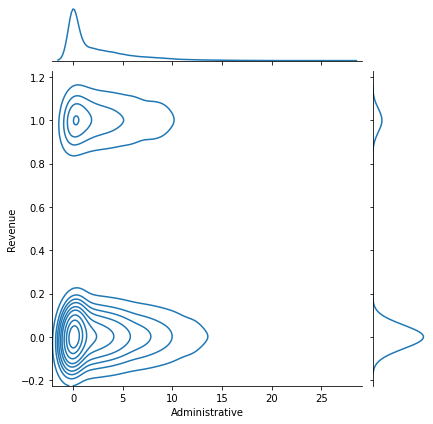

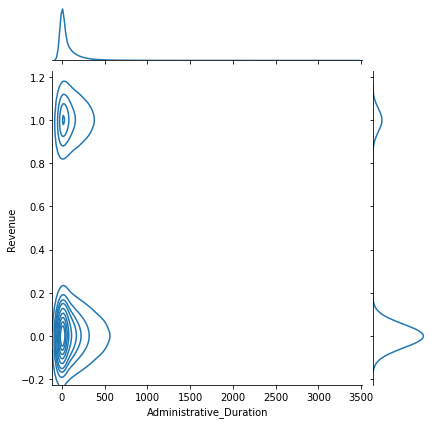

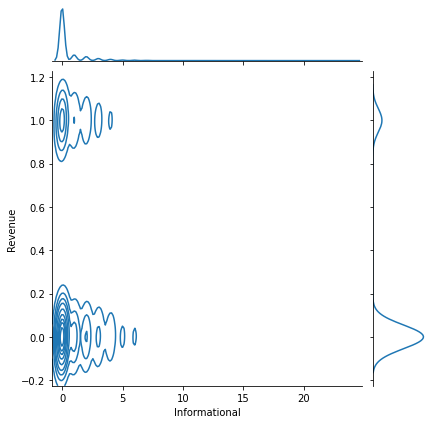

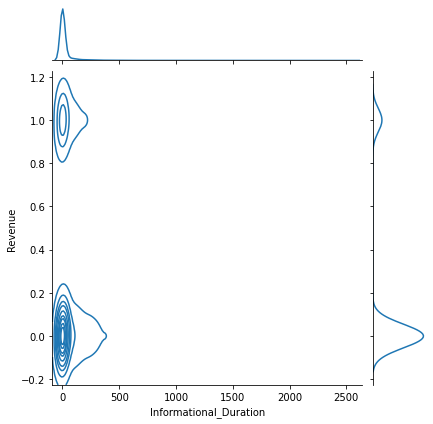

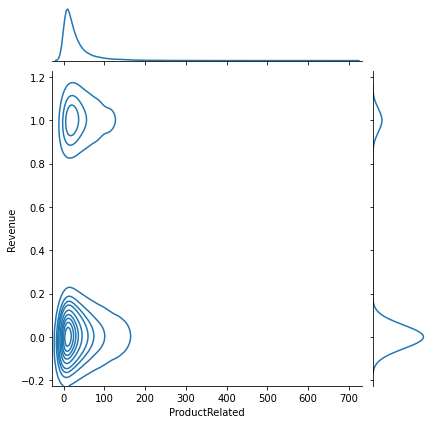

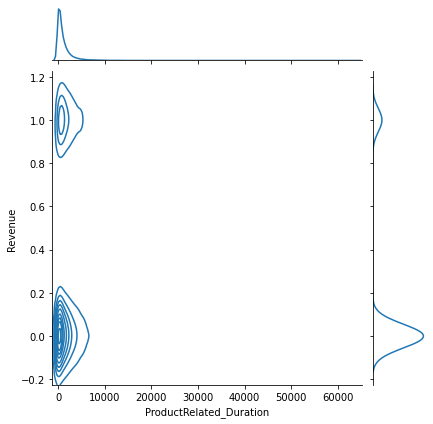

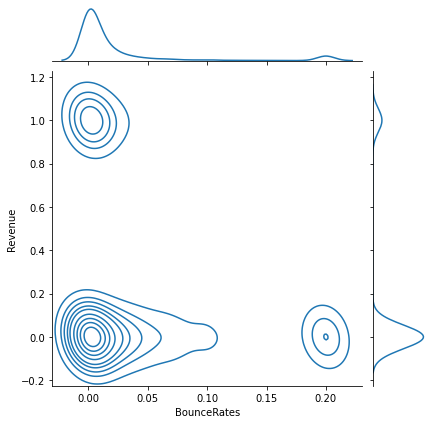

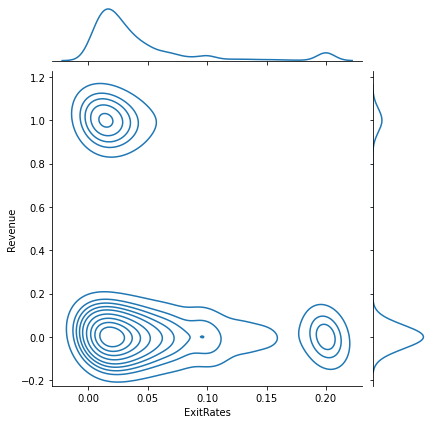

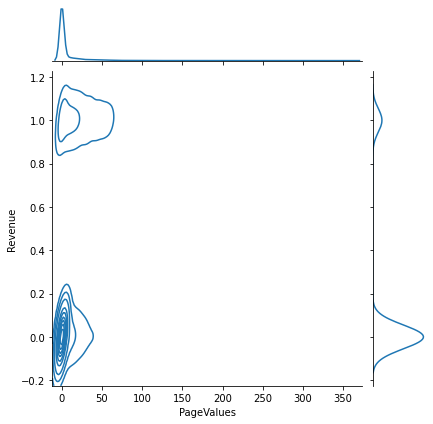

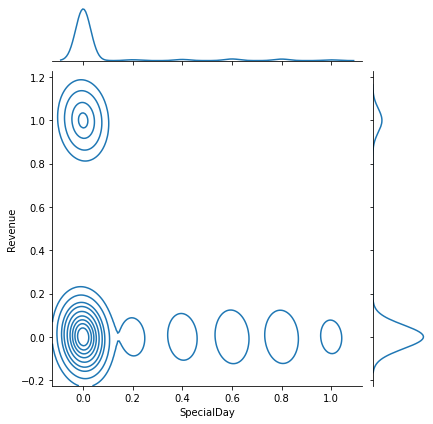

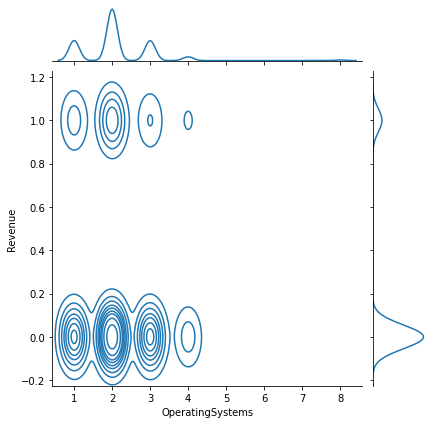

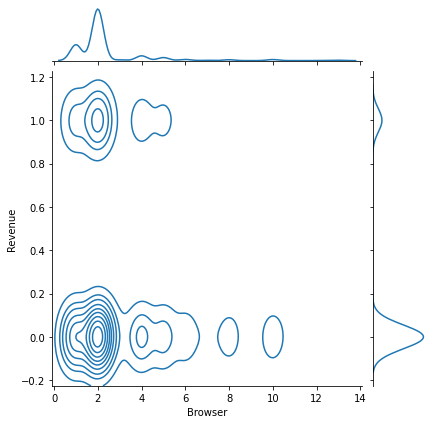

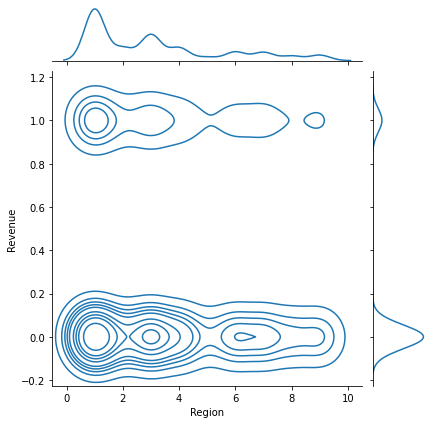

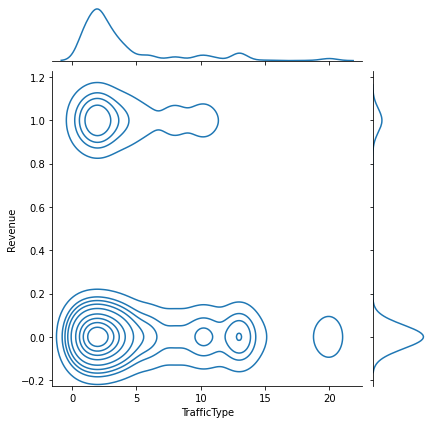

In [ ]:
for c in dataset:
  if c != 'Revenue' and c != 'VisitorType' and c != 'Weekend' and c != 'Month':
    sns.jointplot(x=dataset[c], y=dataset['Revenue'], kind="kde")

In [ ]:
# In this step we use OneHote encoding for 'OneHot_list' becuase values are not ordinal

OneHote_data = fillNanMode_data.copy()

def makeOneHot(name):
  dummies = pd.get_dummies(fillNanMode_data[name])
  for col in dummies:
    if type(col) is float:
      OneHote_data[(name+str(int(col)))] = dummies[col]
    else:
      OneHote_data[(name+'_'+col)] = dummies[col]

OneHot_list = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for i in OneHot_list:
  makeOneHot(i)

OneHote_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,OperatingSystems1,OperatingSystems2,OperatingSystems3,OperatingSystems4,OperatingSystems5,OperatingSystems6,OperatingSystems7,OperatingSystems8,Browser1,Browser2,Browser3,Browser4,Browser5,Browser6,Browser7,Browser8,Browser9,Browser10,Browser11,Browser12,Browser13,Region1,Region2,Region3,Region4,Region5,Region6,Region7,Region8,Region9,TrafficType1,TrafficType2,TrafficType3,TrafficType4,TrafficType5,TrafficType6,TrafficType7,TrafficType8,TrafficType9,TrafficType10,TrafficType11,TrafficType12,TrafficType13,TrafficType14,TrafficType15,TrafficType16,TrafficType17,TrafficType18,TrafficType19,TrafficType20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.000000,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4.0,6.0,1.0,1.0,Returning_Visitor,True,False,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3.0,2.0,1.0,8.0,Returning_Visitor,True,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3.0,2.0,1.0,13.0,Returning_Visitor,True,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2.0,2.0,3.0,11.0,Returning_Visitor,False,False,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# but here we use labelEncode encoding for 'months' becuase month is an ordinal value

labelEncode_data = OneHote_data.drop(OneHot_list, axis=1)

def month_converter(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months.index(month) + 1

arr = []
for month in labelEncode_data['Month']:
  arr.append(month_converter(month))

labelEncode_data['Month'] = np.array(arr)

In [ ]:
labelEncode_data['Weekend'].value_counts()

False    9486
True     2844
Name: Weekend, dtype: int64

In [ ]:
labelEncode_data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
# here we use labelEncode encoding again becuase 'Weekend' andd 'Revenue' have just two value

labelEncode_data['Weekend'] = labelEncode_data['Weekend'].astype(int)
labelEncode_data['Revenue'] = labelEncode_data['Revenue'].astype(int)

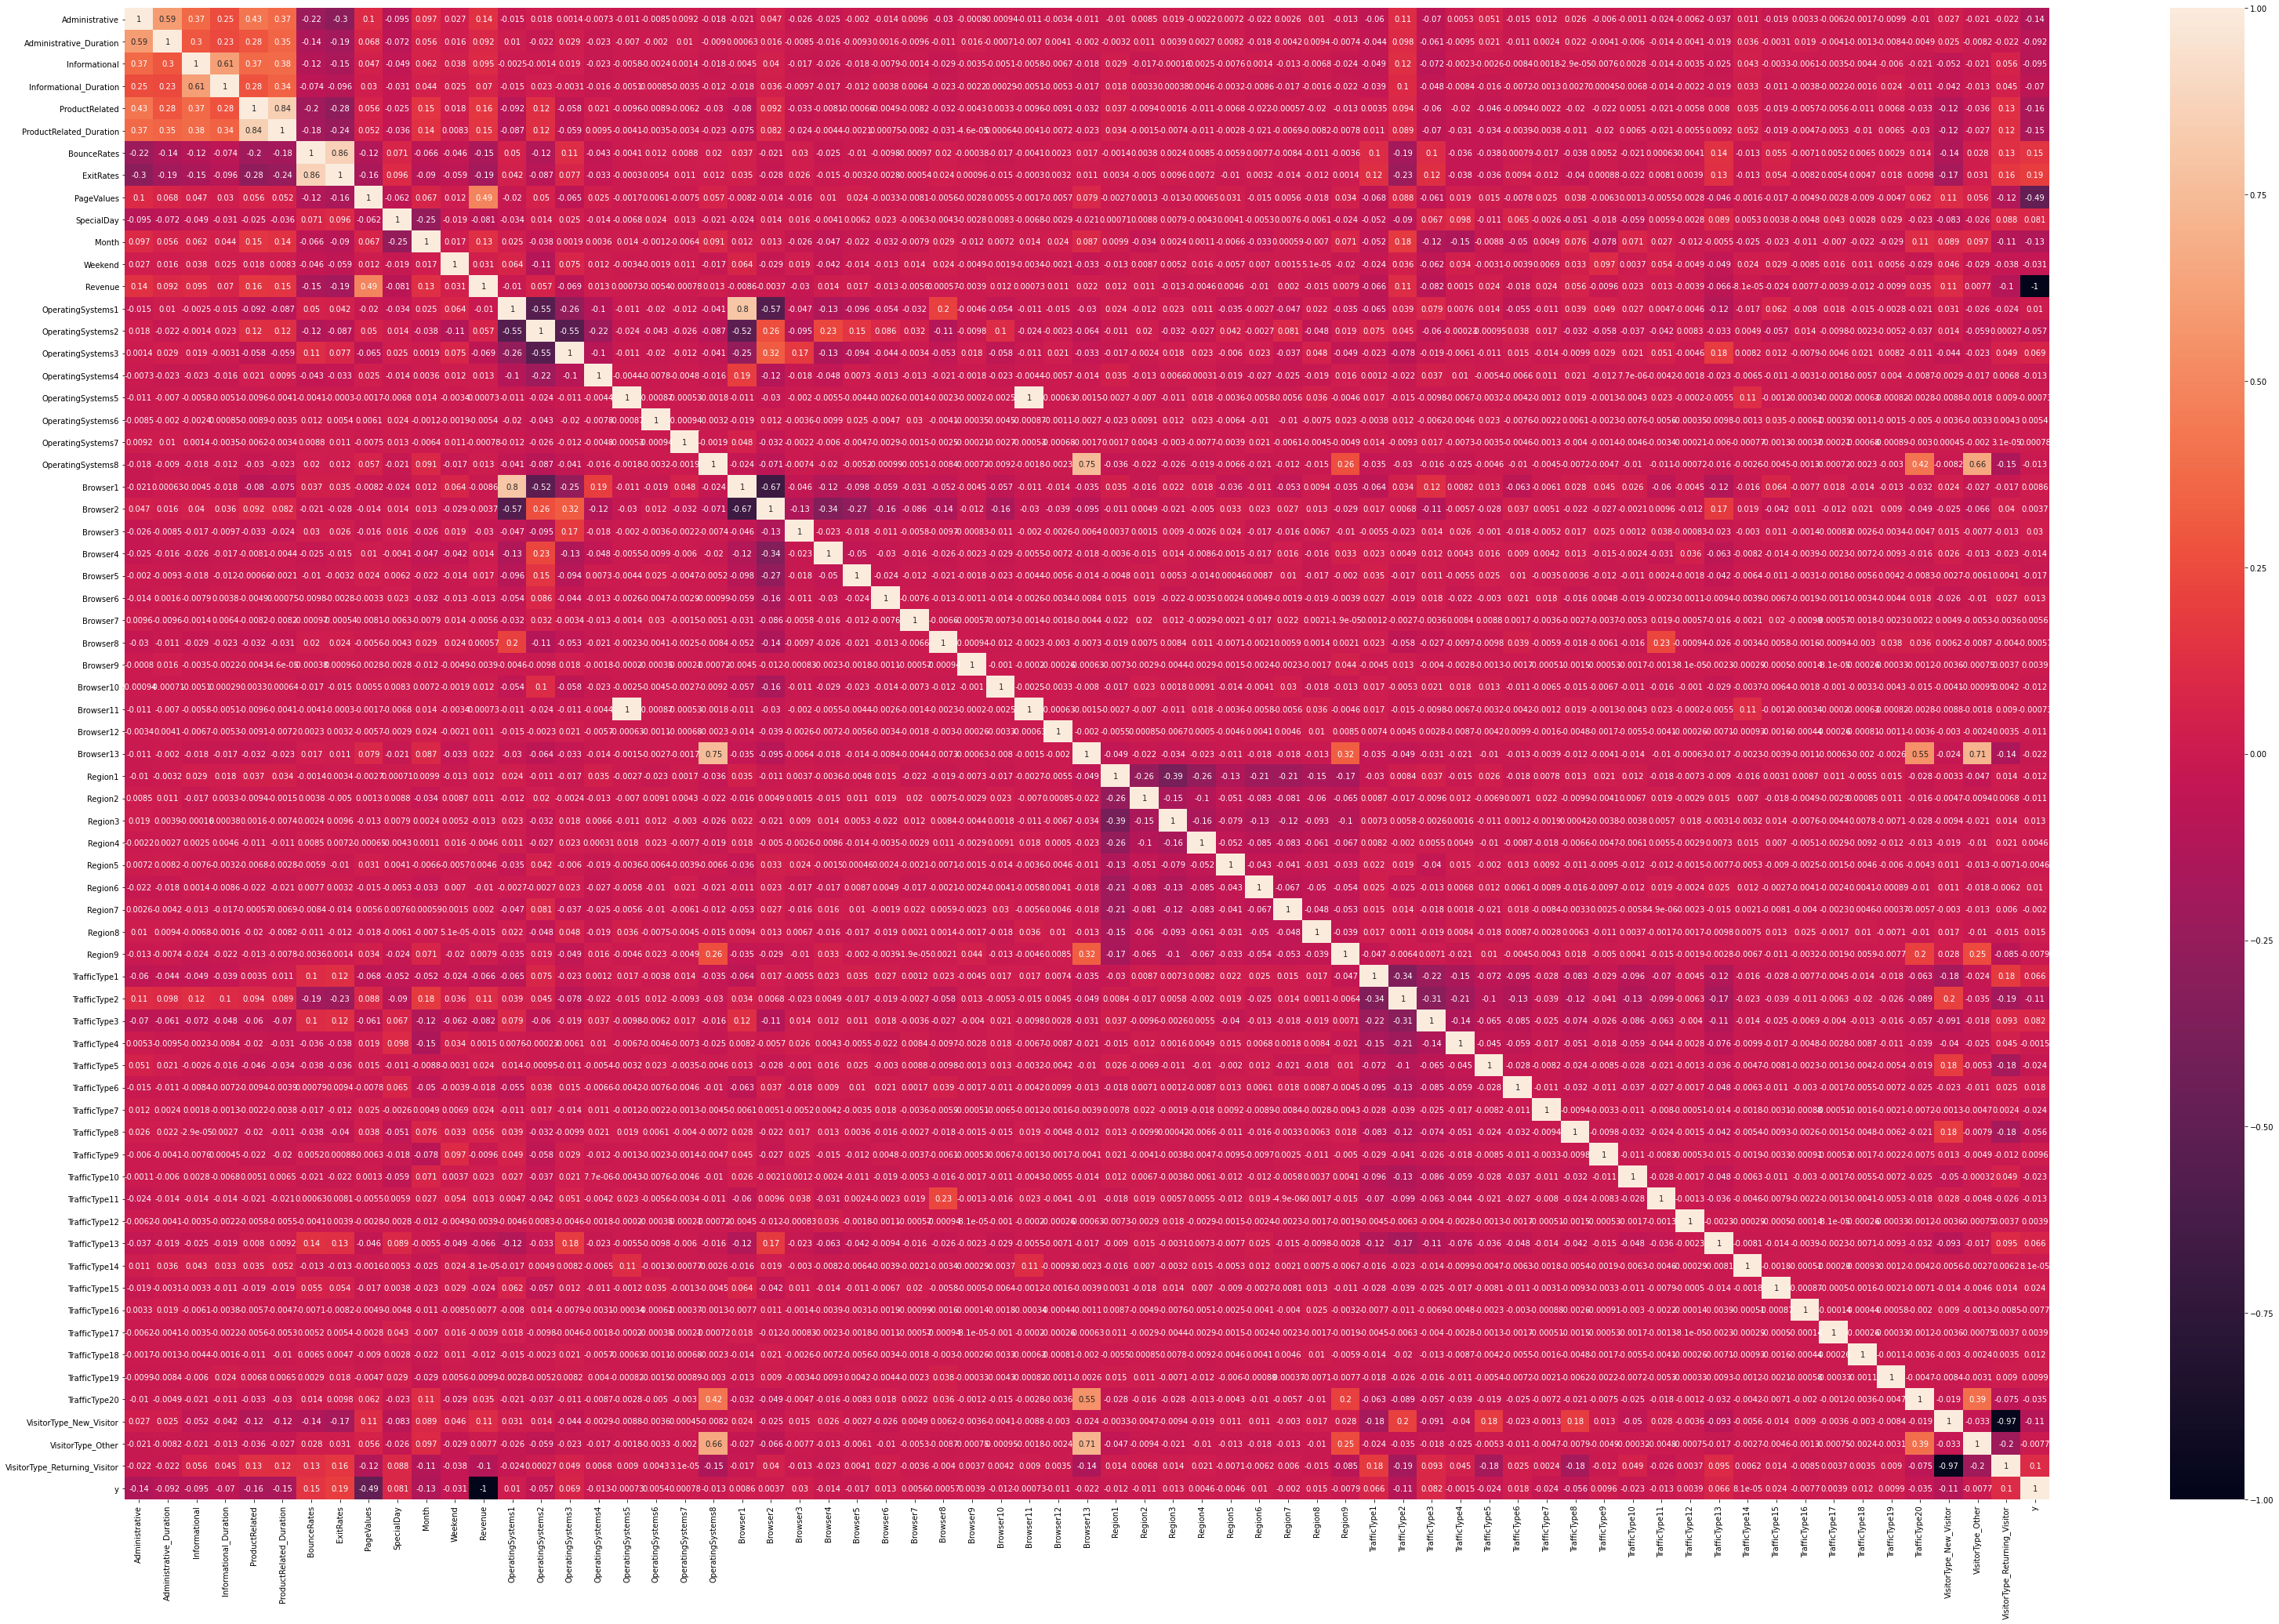

In [ ]:
# calculate correlation

cor = labelEncode_data.corr()

plt.figure(figsize = (55,35))
sn.heatmap(cor, annot=True)
plt.show()

In [ ]:
 # Find 10 top correlation values

def dataframe_to_3darray(df):
  indexList = df.index.to_list()
  arr = []
  for column in df:
    for index, value in enumerate(df[column]):
      if indexList[index] != column:
        arr.append([indexList[index], column, value])
  return arr

corList = dataframe_to_3darray(cor)
corList.sort(key=lambda x: x[2])
dropList = corList[:4] +  corList[-8:]
dropList

[['y', 'Revenue', -1.0],
 ['Revenue', 'y', -1.0],
 ['VisitorType_Returning_Visitor',
  'VisitorType_New_Visitor',
  -0.971749530869007],
 ['VisitorType_New_Visitor',
  'VisitorType_Returning_Visitor',
  -0.971749530869007],
 ['Browser1', 'OperatingSystems1', 0.8025406424543661],
 ['OperatingSystems1', 'Browser1', 0.8025406424543661],
 ['ProductRelated_Duration', 'ProductRelated', 0.8437644720059534],
 ['ProductRelated', 'ProductRelated_Duration', 0.8437644720059534],
 ['ExitRates', 'BounceRates', 0.8626272366205626],
 ['BounceRates', 'ExitRates', 0.8626272366205626],
 ['Browser11', 'OperatingSystems5', 1.0],
 ['OperatingSystems5', 'Browser11', 1.0]]

In [ ]:
# drop most correlated columns

drop_data = labelEncode_data.drop(['Browser11', 'BounceRates', 'ProductRelated_Duration', 'Browser1', 'VisitorType_Returning_Visitor'], axis=1)

In [ ]:
# split X and labels(y)

X = drop_data.drop(['Revenue'], axis=1)
labelEncode_data['y'] = np.array([int(not x) for x in labelEncode_data['Revenue']])
y = labelEncode_data['y'].copy()

In [ ]:
# calculate Mutual information

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[mi_scores > 0]

y                          0.432555
PageValues                 0.159421
ExitRates                  0.036489
ProductRelated             0.026572
Administrative             0.018464
Administrative_Duration    0.014465
Month                      0.013922
Informational_Duration     0.010183
TrafficType12              0.008855
VisitorType_New_Visitor    0.007558
Informational              0.007336
Browser10                  0.006813
Browser7                   0.006712
TrafficType2               0.005942
TrafficType1               0.005201
SpecialDay                 0.004959
Browser4                   0.004429
TrafficType6               0.003686
TrafficType17              0.003671
OperatingSystems2          0.003481
Browser2                   0.003416
TrafficType19              0.003334
TrafficType15              0.002642
OperatingSystems5          0.002402
OperatingSystems6          0.002316
TrafficType10              0.002180
Region6                    0.001957
Browser8                   0

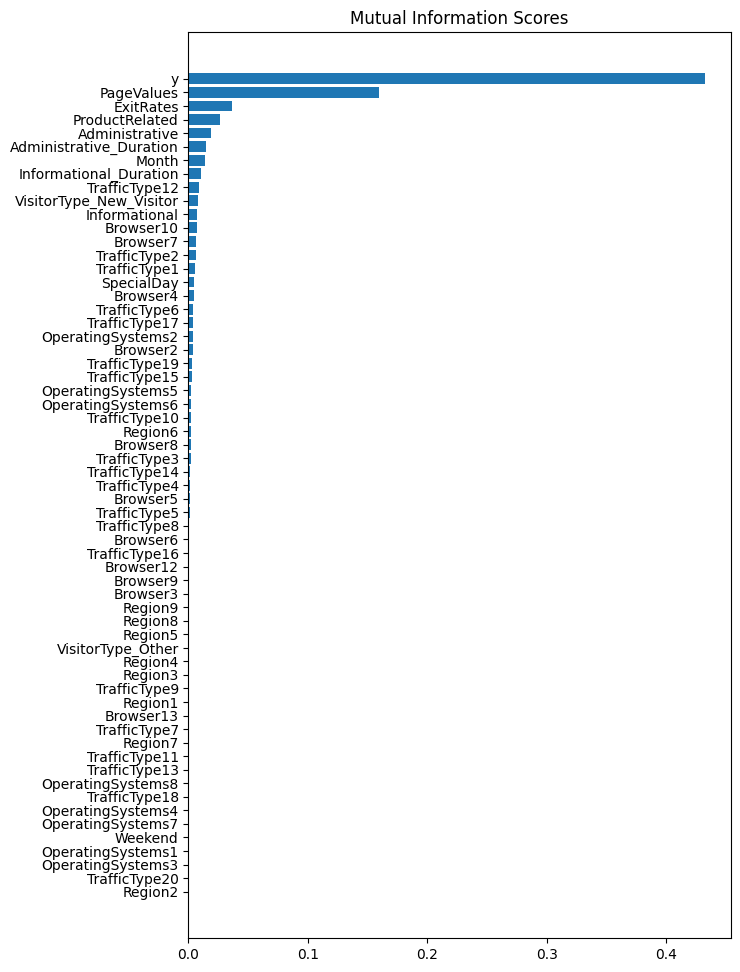

In [ ]:
# plot Mutual information

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(7, 12))
plot_mi_scores(mi_scores)

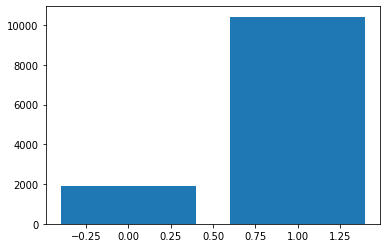

In [ ]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

In [ ]:
# Normalization

scaler = Normalizer()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [ ]:
# split test and train

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# split valid and train

xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42, stratify=ytrain)

In [ ]:
# metrics : f1_score : because labels are skewed so 'precision-recall' score is more accurate

In [ ]:
# make and fit model and print scores

def MakeModel(m, xtrain, ytrain, xvalid, yvalid, key=1):
  model = m
  if key:
    model.fit(xtrain, ytrain)
  precision = precision_score(ytrain, model.predict(xtrain))
  recall = recall_score(ytrain, model.predict(xtrain))
  average_precision = average_precision_score(yvalid, model.predict(xvalid))
  print('train : precision-score: {0:0.2f}, recall-score: {0:0.2f}, average_precision_score: {0:0.2f}'.format(precision, recall, average_precision))
  print()
  precision = precision_score(yvalid, model.predict(xvalid))
  recall = recall_score(yvalid, model.predict(xvalid))
  average_precision = average_precision_score(yvalid, model.predict(xvalid))
  print('validation : precision-score: {0:0.2f}, recall-score: {0:0.2f}, average_precision_score: {0:0.2f}'.format(precision, recall, average_precision))

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
MakeModel(KNeighborsClassifier(), xtrain, ytrain, xvalid, yvalid)

train : precision-score: 0.93, recall-score: 0.93, average_precision_score: 0.93

validation : precision-score: 0.92, recall-score: 0.92, average_precision_score: 0.92


In [ ]:
# SVM

from sklearn.svm import SVC
MakeModel(SVC(random_state=42), xtrain, ytrain, xvalid, yvalid)

train : precision-score: 0.91, recall-score: 0.91, average_precision_score: 0.91

validation : precision-score: 0.91, recall-score: 0.91, average_precision_score: 0.91


In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
MakeModel(LogisticRegression(random_state=42), xtrain, ytrain, xvalid, yvalid)

train : precision-score: 0.89, recall-score: 0.89, average_precision_score: 0.89

validation : precision-score: 0.90, recall-score: 0.90, average_precision_score: 0.90


In [ ]:
# KNN had besr performance

# fine-tune

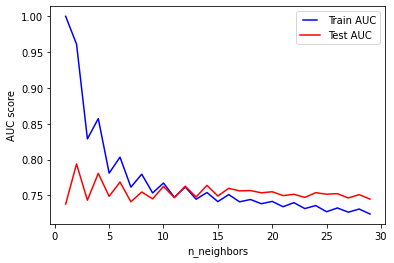

In [ ]:
# KNN had best performance so will fine-tune this model

from sklearn.metrics import roc_curve, auc

neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(xtrain, ytrain)
   train_pred = model.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(xvalid)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

In [ ]:
# n_neighbors=10 had the best result

# evaluate

In [ ]:
final_model = KNeighborsClassifier(n_neighbors=10)
MakeModel(final_model, xtrain, ytrain, xvalid, yvalid)

train : precision-score: 0.92, recall-score: 0.92, average_precision_score: 0.92

validation : precision-score: 0.92, recall-score: 0.92, average_precision_score: 0.92


In [ ]:
# calculate final-score on Test data

precision = precision_score(ytest, model.predict(xtest))
recall = recall_score(ytest, model.predict(xtest))
average_precision = average_precision_score(ytest, model.predict(xtest))
print('FinalScore : precision-score: {0:0.2f}, recall-score: {0:0.2f}, average_precision_score: {0:0.2f}'.format(precision, recall, average_precision))

FinalScore : precision-score: 0.90, recall-score: 0.90, average_precision_score: 0.90
